<a href="https://colab.research.google.com/github/Phanttan/Machine_learning/blob/master/XGBOOST_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theory

---



1.   Gradient Boosting
 [văn bản liên kết](https://en.wikipedia.org/wiki/Gradient_boosting)
2.   Using XGBoost in Python  [văn bản liên kết](https://www.datacamp.com/community/tutorials/xgboost-in-python)

3.   Early stopping in Xgboost training [văn bản liên kết](https://mljar.com/blog/xgboost-early-stopping/)

4.   Extreme gradient boosting with XGBOOST[văn bản liên kết](https://campus.datacamp.com/courses/extreme-gradient-boosting-with-xgboost/)





# Load Dataset and libraries

In [2]:
import pandas as pd
import numpy as np
# Model
import xgboost as xgb
# Metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import graphviz
# Load Datasets
from sklearn.datasets import load_boston
boston = load_boston()

# boston.data.shape
# boston.target.shape
# boston.feature_names

## Convert to DataFrame

In [5]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
# data.shape
# data.describe()
# data.info()
# data.head()

# Using XGBoost

## Choose dataset

In [6]:
# Separate Data and Label 
X, y = data.iloc[:,:-1], data.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
483,2.81838,0.0,18.10,0.0,0.532,5.762,40.3,4.0983,24.0,666.0,20.2,392.92
108,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,20.9,395.24
480,5.82401,0.0,18.10,0.0,0.532,6.242,64.7,3.4242,24.0,666.0,20.2,396.90
262,0.52014,20.0,3.97,0.0,0.647,8.398,91.5,2.2885,5.0,264.0,13.0,386.86
285,0.01096,55.0,2.25,0.0,0.389,6.453,31.9,7.3073,1.0,300.0,15.3,394.72


In [ ]:
xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", # reg:linear
                          learning_rate=0.1,
                          n_estimators=10,
                          n_jobs=-1,
                          colsample_bytree=0.3,
                          max_depth=5,
                          alpha=10,
                          random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
rmse

6.135552677589258

## K-fold Cross Validation using XGBoost

In [ ]:
# Convert dataset to Dmatrix that XGBoost support and gives it acclaimed
# performance dn efficiency gains

DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test =  xgb.DMatrix(data=X_test,  label=y_test)
DM_train

In [ ]:
params = {"objective":"reg:squarederror",
          "colsample_bytree":0.3, "learning_rate":0.1,
          "max_depth":5, "alpha":10}
cv_results = xgb.cv(nfold=3,
                dtrain=DM_train,
                params=params,
                num_boost_round=50,
                early_stopping_rounds=10,
                metrics="rmse",
                as_pandas=True,
                seed=123) # pseudorandom number to ensure the same sample each time the dataset is generated

In [ ]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,12.878140,0.193061,12.889267,0.464001
1,11.820660,0.164798,11.860701,0.527283
2,10.858130,0.159179,10.946020,0.539806
3,10.000473,0.120492,10.129205,0.581673
4,9.229700,0.097367,9.397918,0.608989


In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

49    4.333351
Name: test-rmse-mean, dtype: float64


# Visualize Boosting Trees and Feature Importance 

In [ ]:
# Convert dataset to Dmatrix that XGBoost support and gives it acclaimed
# performance dn efficiency gains
data_dmatrix = xgb.DMatrix(data=X, label=y)
xgb_reg_1 = xgb.train(params=params,
                      dtrain=data_dmatrix,
                      num_boost_round=10)

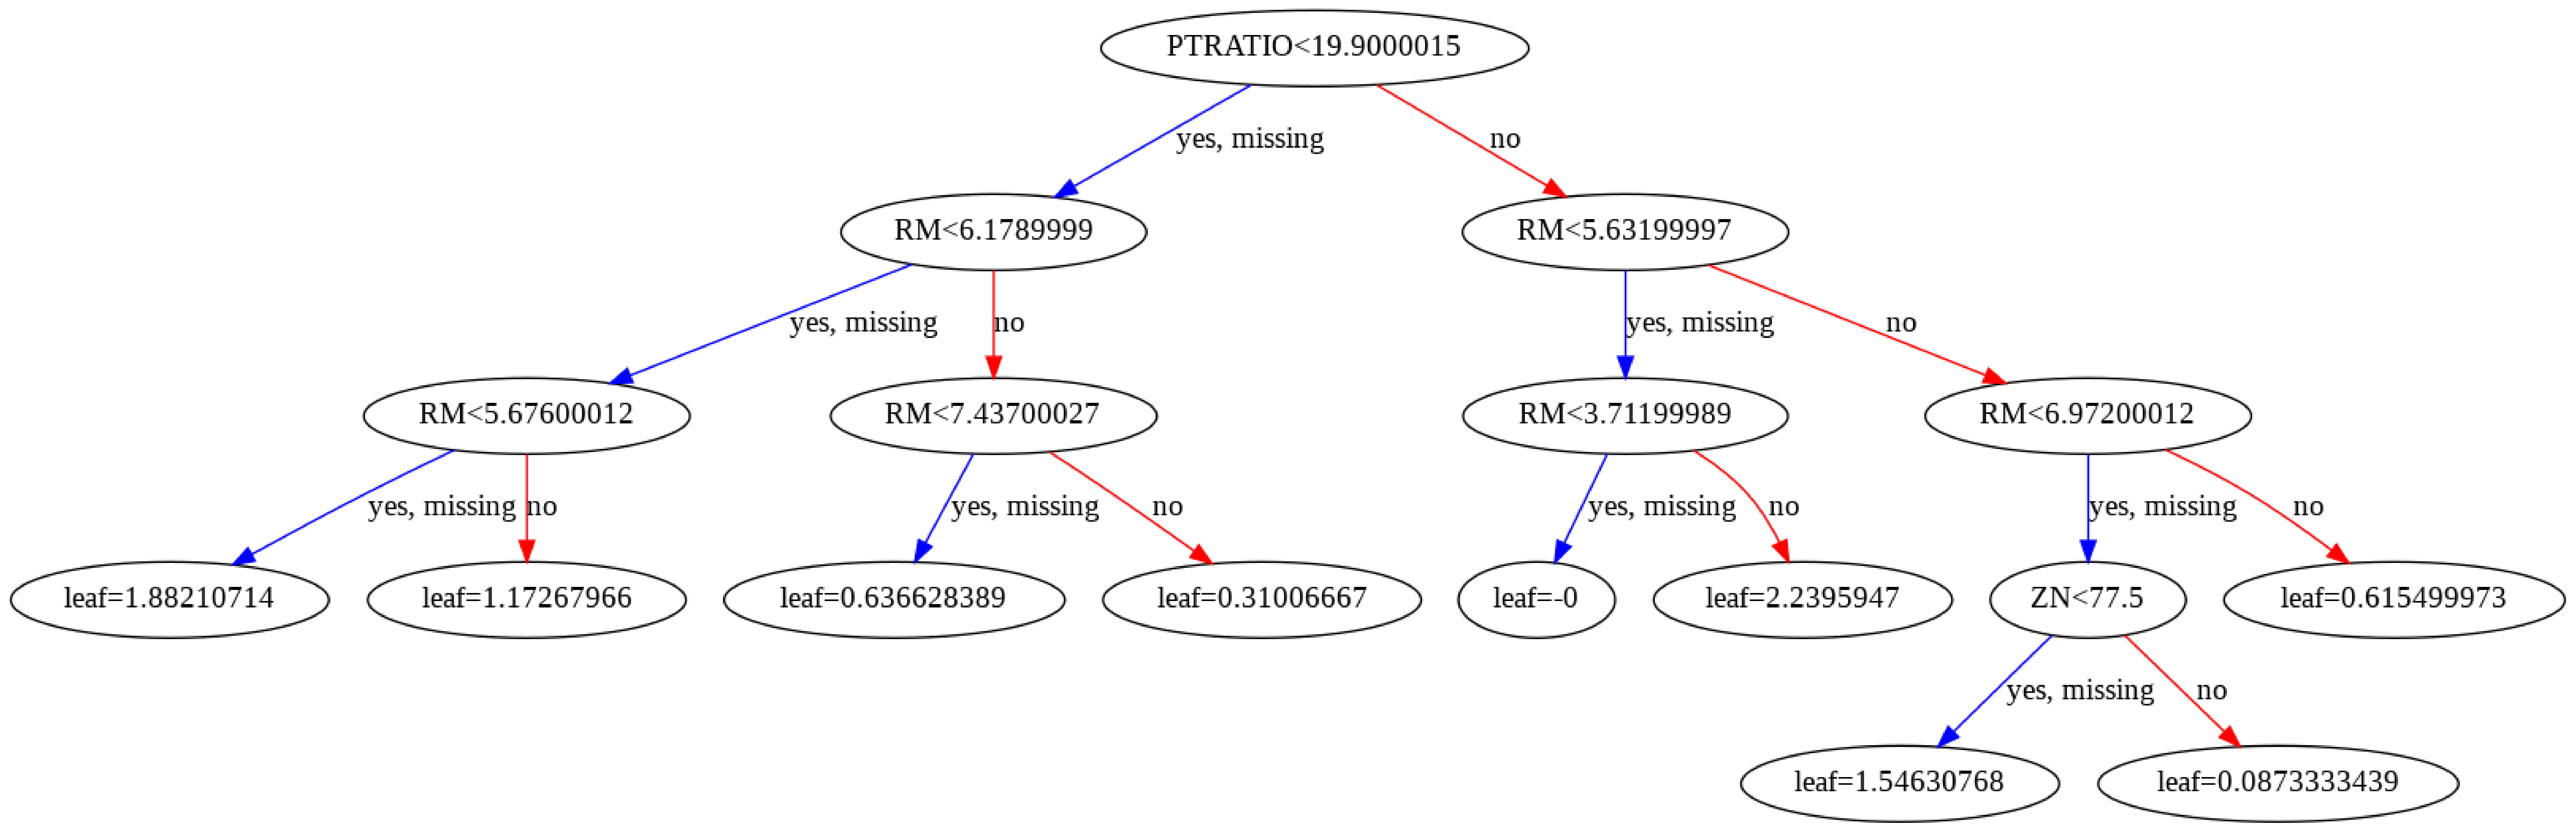

In [ ]:
xgb.plot_tree(xgb_reg_1, num_trees=0)
plt.rcParams['figure.figsize']=[250, 150]
plt.show()

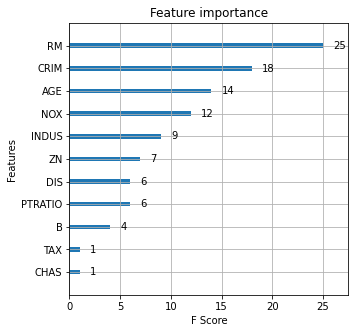

In [ ]:
xgb.plot_importance(xgb_reg_1)
plt.rcParams["figure.figsize"]=[50, 50]
plt.xlabel("F Score")
plt.ylabel("Features")
plt.show()

## Using early_stopping_rounds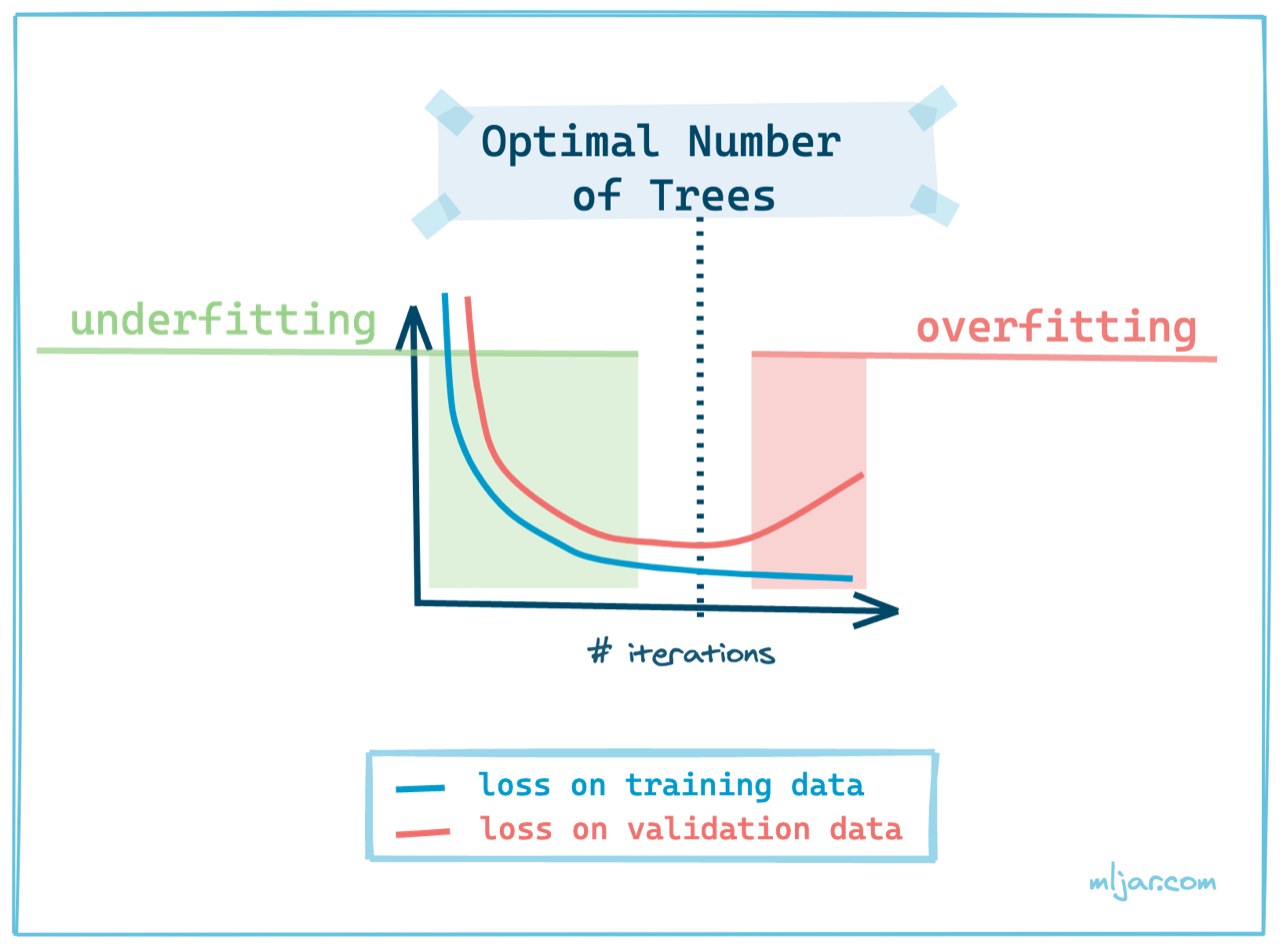

In [ ]:
model = xgb.XGBRegressor(objective="reg:squarederror", # reg:linear
                          learning_rate=0.1,
                          n_estimators=200,
                          n_jobs=-1,
                          colsample_bytree=0.3,
                          max_depth=5,
                          alpha=10,
                          random_state=42)
model.fit(X_train, y_train,
          eval_set=[(X_train, y_train),(X_test, y_test)],
          early_stopping_rounds=20) # will stop after 20 round when validataion_1-rmse has not improved

[0]	validation_0-rmse:12.825	validation_1-rmse:13.0729
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:11.726	validation_1-rmse:12.0785
[2]	validation_0-rmse:10.7103	validation_1-rmse:11.0917
[3]	validation_0-rmse:9.82633	validation_1-rmse:10.2706
[4]	validation_0-rmse:9.05218	validation_1-rmse:9.56136
[5]	validation_0-rmse:8.34178	validation_1-rmse:8.87707
[6]	validation_0-rmse:7.72092	validation_1-rmse:8.30035
[7]	validation_0-rmse:7.10008	validation_1-rmse:7.74198
[8]	validation_0-rmse:6.55246	validation_1-rmse:7.26903
[9]	validation_0-rmse:6.10749	validation_1-rmse:6.91769
[10]	validation_0-rmse:5.69518	validation_1-rmse:6.62012
[11]	validation_0-rmse:5.29617	validation_1-rmse:6.24126
[12]	validation_0-rmse:4.9293	validation_1-rmse:6.01601
[13]	validation_0-rmse:4.61425	validation_1-rmse:5.79766
[14]	validation_0-rmse:4.33451	validation_1-rmse:5.56083

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
results = model.evals_result()
results.keys()

dict_keys(['validation_0', 'validation_1'])

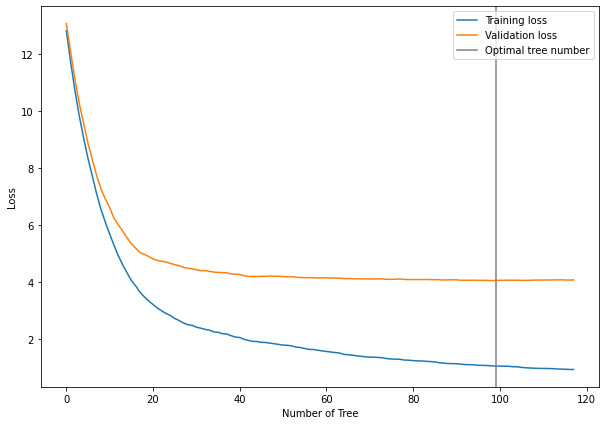

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(results['validation_0']['rmse'], label="Training loss")
plt.plot(results['validation_1']['rmse'], label="Validation loss")
plt.axvline(x=model.best_ntree_limit, ymin=0, ymax=14, color='gray', 
            label="Optimal tree number")
plt.xlabel("Number of Tree")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.show()

In [ ]:
model.predict(X_test, ntree_limit=model.best_ntree_limit)

array([ 6.971497 , 21.389183 ,  6.3066764, 15.424597 , 13.952014 ,
       15.805417 ,  9.390994 , 12.661298 ,  6.9403343,  9.536036 ,
        8.443841 , 18.537344 , 13.776182 , 11.058967 , 20.593584 ,
       15.719774 , 13.6477585, 11.098074 , 10.889199 , 18.753128 ,
       19.190668 ,  8.407727 ,  5.9215903,  9.92944  , 11.7860775,
       23.215143 , 18.713444 ,  8.026954 ,  7.0940976,  6.629637 ,
        7.0872965, 10.166506 ,  3.6977482, 13.132393 ,  7.832264 ,
       20.538044 , 10.436992 , 14.467843 , 24.028545 ,  7.305281 ,
        5.068576 , 18.380182 ,  7.8000283,  5.6770573,  8.539936 ,
        6.7284927, 18.299154 , 16.906052 ,  6.093408 , 16.752237 ,
       14.408861 ,  8.117796 , 13.306141 , 14.3252125, 23.358503 ,
        7.9193516, 22.585983 ,  5.593262 , 15.175061 ,  9.288052 ,
       18.38265  ,  7.3817644, 10.908218 ,  6.5266523,  7.118611 ,
        5.9115853, 22.733015 , 12.6884   , 11.722713 , 23.29112  ,
       15.757148 , 17.29628  ,  7.7346807,  9.938972 , 15.5953

In [ ]:
import os
os.remove("boston_earlyStopping.json")

In [ ]:
import pickle
pickle.dump(model, open("boston_earlyStopping.dat","wb"))
new_model = pickle.load(open("boston_earlyStopping.dat","rb"))
new_model.best_ntree_limit

99

# Grid Search

In [ ]:
names= ["crime", "zone","industry","chales","no","rooms","age","distance",
        "radial", "tax", "pupil","aam","lower"]#,"med_price"

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
xgb_gs_params = {'learning_rate':[0.01, 0.1, 0.5, 0.9],
                 'n_estimators':[200],
                 'subsample':[0.3, 0.5, 0.9]}

In [ ]:
xgb_gs = xgb.XGBRegressor()
randomized_mse = RandomizedSearchCV(estimator=xgb_gs,
                                    param_distributions=xgb_gs_params,
                                    random_state=42)
randomized_mse.fit(X,y)

[00:30:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                               

In [ ]:
randomized_mse.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.9, verbosity=1)

In [ ]:
randomized_mse.best_score_

0.4360096077962396

In [ ]:
randomized_mse.best_params_

{'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.9}

# Transformation Pipelines

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

rf_model = xgb.XGBRegressor(learning_rate=0.1,
                             n_estimators=200,
                             seed=123,
                             random_state=42)
rf_pipeline = Pipeline([("st_scaler", StandardScaler()),
                         ("rf_model", RandomForestRegressor(random_state=42))])
scores_pipeline = cross_val_score(rf_pipeline, X, y,
                                  scoring="neg_mean_squared_error", cv=10)
final_avg_rmse_pipeline= np.mean(np.sqrt(np.abs(scores_pipeline))) # using abs because scoring is negative 
final_avg_rmse_pipeline

4.456472502693438

# Combination Pipeline and Cross Validation

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

xgb_pipeline = Pipeline([("st_scaler", StandardScaler()),
                    ("xgb_model", xgb.XGBRegressor(random_state=42, seed=123))])
xgb_param_grid = {'xgb_model__subsample': np.arange(0.05, 1, 0.05),
                  'xgb_model__max_depth': np.arange(3,20,1),
                  'xgb_model__colsample_bytree': np.arange(0.1, 1.05, 0.05)}
randomized_neg_mse = RandomizedSearchCV(estimator= xgb_pipeline,
                                        param_distributions=xgb_param_grid,
                                        scoring='neg_mean_squared_error',
                                        cv=4)
randomized_neg_mse.fit(X, y)
best_rmse = np.sqrt(np.abs(randomized_neg_mse.best_score_))
best_param = randomized_neg_mse.best_params_
best_estimator= randomized_neg_mse.best_estimator_

[11:14:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:14:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re